# Support Vector Machine

**Support Vector Machines(SVMs)** are  particularly powerful and flexible class of supervised algorithms for both 
classification and regression. With this assignment we will be going to look into what is Support vector machine 
under hood, and see what it does. Given a set of trained examples, each examples are marked as belonging to a 
particlular category using this algorithm or predicting the values of a given data from trained examples. 

Support vector machine is another simple algorithm that every machine learning expert should have in his/her arsenal. Support vector machine is highly preferred by many as it produces significant accuracy with less computation power. Unlike traditional methods which minimize the empirical training error, SVM aims at minimising an
upper bound of the generalisation error through maximising the margin between the seperating hyperplane and the data. SVMs have been used in a wide variety of applications.

# What is support vector machine?

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.


## Hyperplanes and Support Vectors!

**Hyperplanes are decision boundaries** that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3.

> Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

### Large Margin Intuition

In logistic regression, we take the output of the linear function and squash the value within the range of [0,1] using the sigmoid function. If the squashed value is greater than a threshold value(0.5) we assign it a label 1, else we assign it a label 0. In SVM, we take the output of the linear function and if that output is greater than 1, we identify it with one class and if the output is -1, we identify is with another class. Since the threshold values are changed to 1 and -1 in SVM, we obtain this reinforcement range of values([-1,1]) which acts as margin.

As an example of this, consider the simple case of a classification task, in which the two classes of points are well separated. Our aim is to simply find a line or curve (in two dimensions) or manifold (in multiple dimensions) that divides the classes from each other.

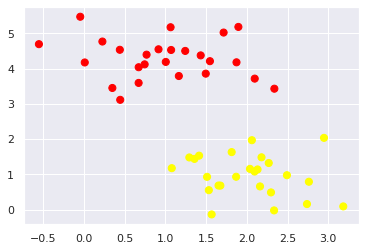

In [3]:
# creating a dataset

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. For two dimensional data like that shown here, this is a task we could do by hand. But immediately we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes!

We can draw them as follows:

(-1.0, 3.0)

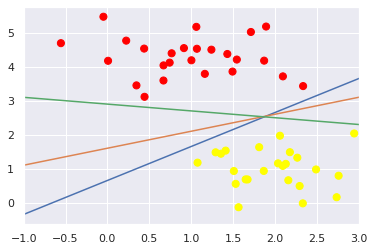

In [4]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')

for m, b in [(1,0.65), (0.5,1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m*xfit + b)
    
plt.xlim(-1,3,5)

Support vector machines offer one way to improve on this. The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point. 

Let's see the result of an actual fit to this data: we will use `Scikit-Learn's support vector classifier to train an SVM model on this data`. For the time being, we will use a linear kernel and set the C parameter to a very large number (we'll discuss the meaning of these in more depth momentarily).

We can visualize what's happening here, let's create a quick convenience function that will plot SVM decision boundaries for us:

SVMs can operate either explicitly in the input space leading to the linear SVM or implicitly in the
the feature space via kernel mapping giving rise to the kernel SVM:

- Linear SVM
- Non-linear SV



# Linear Support vector machine

The basic idea of linear SVMs is to construct a hyperplane as decision plane, which seperates the positive(+1) and 
negative(-1) classes with largest margin, which is related to minimizing the VC dimension of SVM.

> Note: The VC dimension is a property of a set of functions defined for a function f.

It's mostly used in binary classification problems

We are given a training dataset of n points of the form:

`(x1,y1), (x2,y2), (x3,y3), ........., (xn, yn)`

Any hyperplane can be written as set of points x satisfying point such that the optimal distance of seperation of
two classses, where margin is of two points at the maximum:

`w.x -b = 0`
where w is the normal vector to the hyperplane

In [9]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


### Plotting the SVM decision function

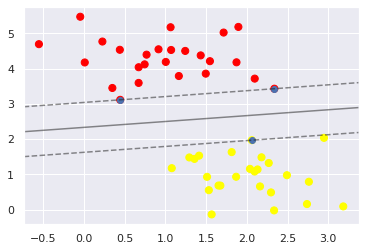

In [10]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X, Y, P, colors='k', levels=[-1,0,1], 
              alpha=0.5, linestyles=['--','-','--'])
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],(model.support_vectors_[:, 1]),)    
    ax.set_xlim(xlim) ; ax.set_ylim(ylim)
        
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

This is the dividing line that maximizes the margin between the two sets of points. Notice that a few of the training points just touch the margin: they are indicated by the black circles in this figure. These points are the pivotal elements of this fit, and are known as the support vectors, and give the algorithm its name. In Scikit-Learn, the identity of these points are stored in the `support_vectors_` attribute of the classifier:

In [11]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

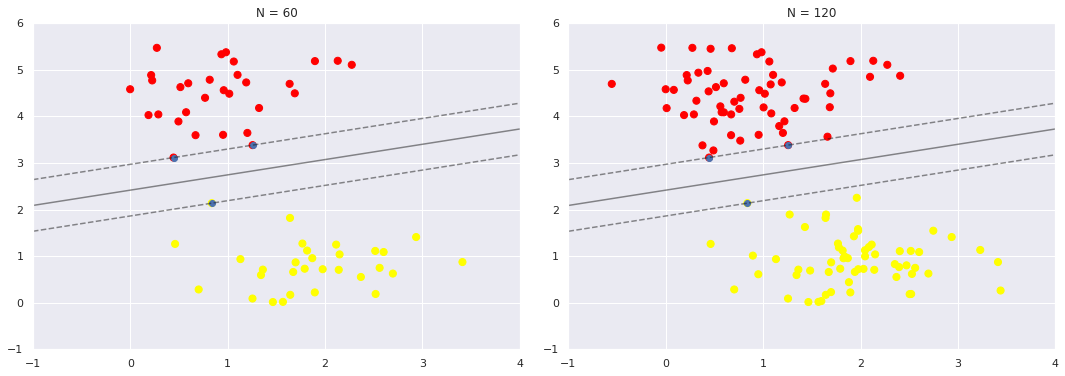

In [13]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))


In [14]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

A key to this classifier's success is that for the fit, only the position of the support vectors matter; any points further from the margin which are on the correct side do not modify the fit! Technically, this is because these points do not contribute to the loss function used to fit the model, so their position and number do not matter so long as they do not cross the margin.

# Non Linear SVM

An extension to nonlinear decision surfaces is necessary since real-life classification problems are hard to be
solved by a linear classifier. When the decision function is not a linear function of data, the data will be mapped 
from the input space into a high dimensional feature space by a non linear transformation.

The original maximum-margin hyperplane algorithm proposed by Vapnik in 1963 constructed a linear classifier. However, in 1992, Bernhard E. Boser, Isabelle M. Guyon and Vladimir N. Vapnik suggested a way to create nonlinear 
classifiers by applying the kernel trick  to maximum-margin hyperplanes. The resulting algorithm is formally 
similar, except that every dot product is replaced by a nonlinear kernel function. This allows the algorithm to fit 
the maximum-margin hyperplane in a transformed feature space. The transformation may be nonlinear and the 
transformed space high-dimensional; although the classifier is a hyperplane in the transformed feature space, it may be nonlinear in the original input space. 

Some common kernels are:

- Polynomial
- Gaussian radial basis function
- Hyperbolic tangent     

The SVM becomes extremely powerful is when it is combined with kernels. There we projected our data into higher-
dimensional space defined by polynomials and Gaussian basis functions, and thereby were able to fit for nonlinear 
relationships with a linear classifier.

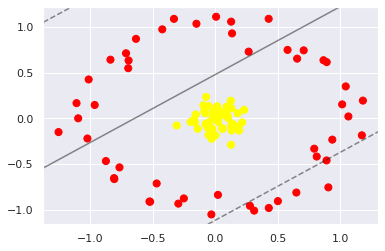

In [16]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);


It is clear that no linear discrimination will ever be able to separate this data. It is clear that no linear discrimination will ever be able to separate this data.  For example, one simple projection we could use would be to compute a radial basis function centered on the middle clump.

We can visualize this extra data dimension using a three-dimensional plot. One strategy to this end is to compute a basis function centered at every point in the dataset, and let the SVM algorithm sift through the results. This type of basis function transformation is known as a kernel transformation, as it is based on a similarity relationship (or kernel) between each pair of points.

In Scikit-Learn, we can apply kernelized SVM simply by changing our linear kernel to an RBF (radial basis function) kernel, using the `kernel` model hyperparameter:

In [17]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

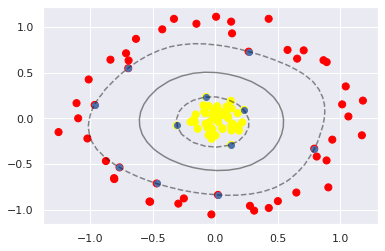

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');


Using this kernelized support vector machine, we learn a suitable nonlinear decision boundary. This kernel transformation strategy is used often in machine learning to turn fast linear methods into fast nonlinear methods, especially for models in which the kernel trick can be used.

# Applications

SVMs can be used to solve various real-world problems: 

- SVMs are helpful in text and hypertext categorization, as their application can significantly reduce the need for labeled training instances in both the standard inductive and transductive settings. Some methods for shallow semantic parsing are based on support vector machines.
- Classification of images can also be performed using SVMs. Experimental results show that SVMs achieve significantly higher search accuracy than traditional query refinement schemes after just three to four rounds of relevance feedback. This is also true for image segmentation systems, including those using a modified version SVM that uses the privileged approach as suggested by Vapnik.
- Classification of satellite data like SAR data using supervised SVM.
- Hand-written characters can be recognized using SVM.
- The SVM algorithm has been widely applied in the biological and other sciences. They have been used to classify proteins with up to 90% of the compounds classified correctly. Permutation tests based on SVM weights have been suggested as a mechanism for interpretation of SVM models.
- Can be used for face recognition on labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures. 

## Advantages

- Produce very accuracte classifiers
- Robust to noise, less overfitting

**REFERENCES**

- DataScience Handbook
- TP Series
-  Vapnik, Vladimir N. (1995). "Support-vector networks"